# Introduction to GIS - Using GeoPandas

- Dennis Milechin, P.E., GISP
- <a href="http://rcs.bu.edu">Research Computing Services</a>

## Data Files
http://rcs.bu.edu/examples/gis/tutorials/python_geopandas/tut_geopandas-main.zip



In [1]:
!wget http://rcs.bu.edu/examples/gis/tutorials/python_geopandas/tutorial_files.zip

--2025-01-28 21:12:19--  http://rcs.bu.edu/examples/gis/tutorials/python_geopandas/tutorial_files.zip
Resolving rcs.bu.edu (rcs.bu.edu)... 128.197.160.76
Connecting to rcs.bu.edu (rcs.bu.edu)|128.197.160.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41006917 (39M) [application/zip]
Saving to: ‘tutorial_files.zip’

tutorial_files.zip  100%[===================>]  39.11M  6.15MB/s    in 11s     

2025-01-28 21:12:30 (3.58 MB/s) - ‘tutorial_files.zip’ saved [41006917/41006917]



In [2]:
!unzip tutorial_files.zip

Archive:  tutorial_files.zip
   creating: mbta_rapid_transit/
 extracting: mbta_rapid_transit/MBTA_ARC.cpg  
  inflating: mbta_rapid_transit/MBTA_ARC.dbf  
  inflating: mbta_rapid_transit/MBTA_ARC.prj  
  inflating: mbta_rapid_transit/MBTA_ARC.sbn  
  inflating: mbta_rapid_transit/MBTA_ARC.sbx  
  inflating: mbta_rapid_transit/MBTA_ARC.shp  
  inflating: mbta_rapid_transit/MBTA_ARC.shp.xml  
  inflating: mbta_rapid_transit/MBTA_ARC.shx  
 extracting: mbta_rapid_transit/MBTA_NODE.cpg  
  inflating: mbta_rapid_transit/MBTA_NODE.dbf  
  inflating: mbta_rapid_transit/MBTA_NODE.prj  
  inflating: mbta_rapid_transit/MBTA_NODE.sbn  
  inflating: mbta_rapid_transit/MBTA_NODE.sbx  
  inflating: mbta_rapid_transit/MBTA_NODE.shp  
  inflating: mbta_rapid_transit/MBTA_NODE.shp.xml  
  inflating: mbta_rapid_transit/MBTA_NODE.shx  
  inflating: mbta_rapid_transit/MBTA_Rapid_Transit.lyr  
  inflating: mbta_rapid_transit/MBTA_Rapid_Transit_9.lyr  
   creating: tissots_circles/
 extracting: tissots_cir

# Workshop Outcomes

1. Learn basic concepts of GIS Theory (Data Models, Datum/Geographic Coordinate system, Projections)
1. Learn how to apply GIS concepts using GeoPandas.

# Outline

1. What is GIS?
1. Common GIS Data Models
1. Explore GeoPandas
1. Datum/Geographic Coordinate System (GCS)
1. Projections
1. Coordinate Reference System (CRS)
1. Spatial Attributes
1. Spatial Processing
1. Saving GIS Data


# 1. What is GIS?

“A geographic information system (GIS) is a system designed to capture, store, manipulate, analyze, manage, and present spatial or geographic data”

<sup>Source: https://en.wikipedia.org/wiki/Geographic_information_system</sup>


## Typical functions of GIS software

- Read/write spatial data
- Maintain spatial meta data
- Apply transformations for projections
- Visualize symbology based on attribute table
- Allow layering of data
- Tools to query/filter data
- Spatial analysis tools
- Exporting tools for printing maps or publish web maps


# 2. Common GIS Data Models

- Raster
- Vector

### Vector

<img src="https://github.com/milechin/tut_geopandas/blob/main/images/vector_data.png?raw=true" alt="compass" style="width:800px"/>    



# 3. Let's Explore GeoPandas

> GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

<sup>source: https://geopandas.org/index.html</sup>

__Note:__ GeoPandas is for processing vector data.

User Guide: https://geopandas.org/docs/user_guide.html

### GeoPandas - Dependencies

- __numpy__
- __pandas__
- __shapely__  - Spatial Operations
- __fiona__  - Reading and Writing Files
- __pyproj__ - Projection definition and transformations
- __rtree__ - spatial index to improve performance and required for overlay operations; interface to libspatialindex
- __psycopg2__ - for PostGIS connection
- __GeoAlchemy2__ - for writing to PostGIS
- __geopy__ - for geocoding
- __matplotlib__
- __mapclassify__

Source: https://geopandas.org/getting_started/install.html#dependencies

### Read Shapefile


In [5]:
import geopandas

mbta_stations = geopandas.read_file("./mbta_rapid_transit/MBTA_NODE.shp")
mbta_stations.head()

,STATION,LINE,TERMINUS,ROUTE,geometry
0,Ashmont,RED,Y,A - Ashmont C - Alewife,POINT (236007.538 892693.023)
1,Harvard,RED,N,A - Ashmont B - Braintree C - Alewife,POINT (231387.274 902684.016)
2,Kendall/MIT,RED,N,A - Ashmont B - Braintree C - Alewife,POINT (234087.917 901406.551)
3,Capen Street,RED,N,Mattapan Trolley,POINT (234055.438 890869.375)
4,Tufts Medical Center,ORANGE,N,Forest Hills to Oak Grove,POINT (235900.324 899934.313)


- "geometry" column contains spatial information.
- rows - known as "features" or "records".
- columns - known as "attributes" or "fields".

Let's look at types for each column:

In [6]:
mbta_stations.dtypes

,0
STATION,object
LINE,object
TERMINUS,object
ROUTE,object
geometry,geometry


### Plotting

<Axes: >

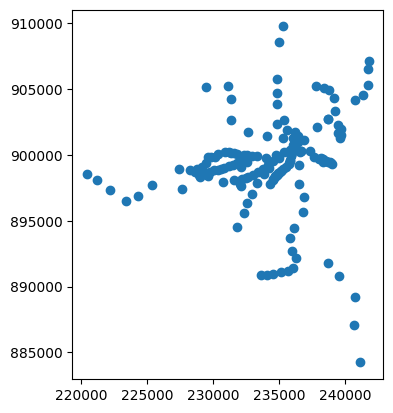

In [36]:
mbta_stations.plot()

<Axes: >

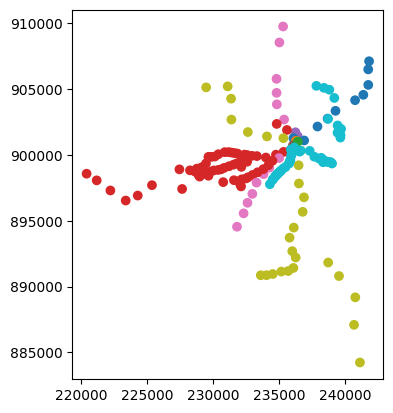

In [37]:
mbta_stations.plot(column="LINE", legend=False)

### Load Polyline Data

In [7]:
mbta_lines = geopandas.read_file("./mbta_rapid_transit/MBTA_ARC.shp")
mbta_lines.head()

,LINE,ROUTE,GRADE,SHAPE_LEN,geometry
0,SILVER,SL3,3,79.538315,"LINESTRING (238786.088 902727.2, 238786.654 90..."
1,SILVER,SL3,1,439.557315,"LINESTRING (238823.606 904952.475, 238807.669 ..."
2,SILVER,SL3,1,680.245154,"LINESTRING (237840.206 905243.356, 237838.544 ..."
3,SILVER,SL3,1,590.780545,"LINESTRING (238411.712 905095.055, 238375.464 ..."
4,SILVER,SL3,1,819.160963,"LINESTRING (239198.867 904254.943, 239205.64 9..."


In [8]:
mbta_lines.LINE.unique()

array(['SILVER', 'ORANGE', 'GREEN', 'RED', 'BLUE'], dtype=object)

<Axes: >

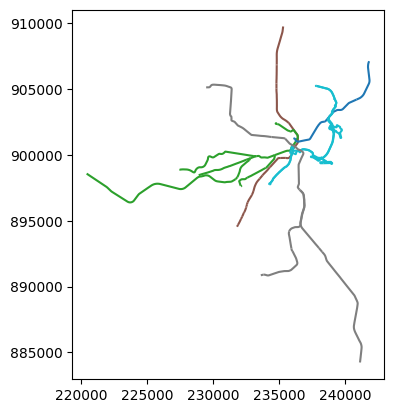

In [9]:
mbta_lines.plot(column="LINE", cmap='tab10')

### Select By Attribute

In [41]:
mbta_lines.LINE.unique()

array(['SILVER', 'ORANGE', 'GREEN', 'RED', 'BLUE'], dtype=object)

In [42]:
green_line = mbta_lines[mbta_lines["LINE"]=="GREEN"]
green_line

,LINE,ROUTE,GRADE,SHAPE_LEN,geometry
22,GREEN,D - Riverside,1,1618.957543,"LINESTRING (231830.985 898312.562, 231847.343 ..."
23,GREEN,D - Riverside,7,196.041784,"LINESTRING (231700.045 898167.952, 231711.247 ..."
24,GREEN,D - Riverside,7,199.124804,"LINESTRING (232728.037 899595.257, 232735.149 ..."
25,GREEN,C - Cleveland Circle,7,360.242405,"LINESTRING (232504.049 899629.721, 232825.127 ..."
26,GREEN,B - Boston College,7,184.396047,"LINESTRING (233089.812 899912.687, 233191.155 ..."
27,GREEN,E - Health Street,3,1132.030977,"LINESTRING (232120.839 897609.087, 232127.141 ..."
28,GREEN,E - Health Street,7,1230.956752,"LINESTRING (233995.976 899018.149, 234007.399 ..."
29,GREEN,C D,7,458.876292,"LINESTRING (232842.768 899752.366, 233178.939 ..."
30,GREEN,B C D E,7,2121.006147,"LINESTRING (234670.367 899983.643, 234771.591 ..."
32,GREEN,C E,7,1241.873692,"LINESTRING (236291.833 901071.164, 236294.248 ..."


<Axes: >

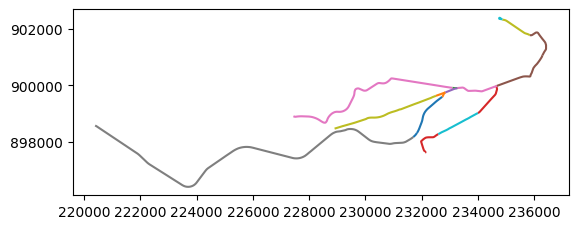

In [43]:
green_line.geometry.plot(cmap='tab10')

### Color by Attribute

<sup>This example obtained from : https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/</sup>


In [44]:
import matplotlib.pyplot as plt
subway_colors = {'SILVER': 'grey',
               'ORANGE': 'orange',
               'GREEN': 'green',
               'RED': 'red',
                'BLUE':'blue'}

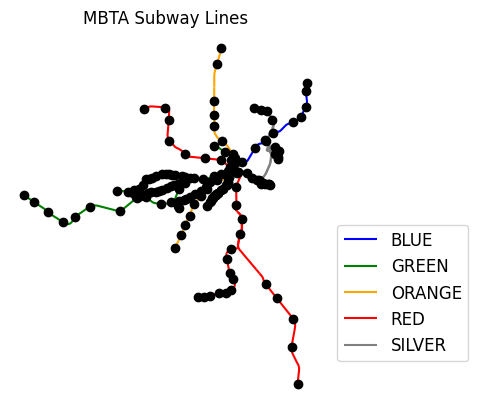

In [45]:
fig, ax = plt.subplots()
for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)

ax.legend(bbox_to_anchor=(1.5, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()

mbta_stations.plot(ax=ax, color="black", zorder=2)
plt.show()

### Load data from Geodatabase

- *Geodatabase* is an ESRI developed model.  Similiar open source is *GeoPackage*.
- Both act like a database and will contain multiple layers.

In [10]:
gdp_path = "./tlgdb_2019_a_25_ma.gdb"
geopandas.list_layers(gdp_path)

,name,geometry_type
0,Block,MultiPolygon
1,Census_Tract,MultiPolygon
2,County_Subdivision,MultiPolygon
3,Block_Group,MultiPolygon
4,Census_Designated_Place,MultiPolygon
5,County,MultiPolygon
6,Incorporated_Place,MultiPolygon


In [11]:
ma_block = geopandas.read_file(gdp_path, layer="Block_Group")

In [12]:
ma_block.head()

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,250010101001,Block Group 1,22251666.0,11702725.0,+42.0598291,-70.2004073,"MULTIPOLYGON (((-70.25001 42.0641, -70.24959 4..."
1,250010101002,Block Group 2,1325184.0,765208.0,+42.0620693,-70.1629235,"MULTIPOLYGON (((-70.18114 42.06232, -70.18109 ..."
2,250010101003,Block Group 3,485889.0,0.0,+42.0581234,-70.1828958,"MULTIPOLYGON (((-70.18884 42.05885, -70.18805 ..."
3,250010101004,Block Group 4,641686.0,162664.0,+42.0533919,-70.1874300,"MULTIPOLYGON (((-70.19574 42.05457, -70.19573 ..."
4,250010101005,Block Group 5,341792.0,135275.0,+42.0485956,-70.1901156,"MULTIPOLYGON (((-70.19674 42.04849, -70.1966 4..."


<Axes: >

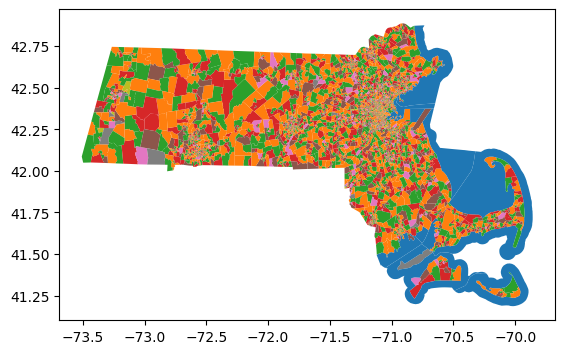

In [49]:
ma_block.plot(column="NAMELSAD")

###  Common Standards of Vector Data
1. Points, Lines, and Polygon are not mixed together in one attribute table.
    

In [50]:
print("mbta_stations")
print(mbta_stations.geometry.type.unique())

print("\nmbta_lines")
print(mbta_lines.geometry.type.unique())

print("\nma_block")
print(ma_block.geometry.type.unique())

mbta_stations
['Point']

mbta_lines
['LineString' 'MultiLineString']

ma_block
['MultiPolygon']


2. Features of similiar characteristics refered to as "layer".

  - *mbta_lines* - Only contains features and attributes of MBTA subway tracks.
  - *mbta_stations* - Only contains features and attributes of subway station stops.
  - *ma_block* - Only contains features and attributes of census block groups.

### Metadata
information about the data
  - Who created the data?
  - How it was obtained?
  - Definition of attributes/fields.
  - Limitations of the data.
  
Example:
- https://www.mass.gov/info-details/massgis-data-municipalities
- https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2020/2020_TIGER_GDB_Record_Layouts.pdf



### Coordinate Reference System - CRS
Let's plot all three layers on a single map.

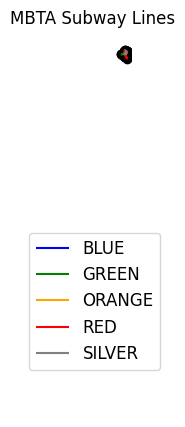

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))

for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)

ax.legend(bbox_to_anchor=(1.5, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()

mbta_stations.plot(ax=ax, color="black", zorder=1)  # MBTA Stations layer
ma_block.plot(ax=ax) # MA Group Block layer

plt.show()

In [32]:
print("mbta_lines CRS")
print(mbta_lines.crs)
print("\nmbta_stations CRS")
print(mbta_stations.crs)
print("\nma_block CRS")
print(ma_block.crs)

mbta_lines CRS
EPSG:26986

mbta_stations CRS
EPSG:26986

ma_block CRS
EPSG:4269


# 6. Coordinate Reference System

__Geographic coordinate system__ and __projections__ are known as Coordinate Reference System (__CRS__) in GIS.

### GeoPandas CRS Functions

<table>
<colgroup>
<col style="width: 10%" />
<col style="width: 90%" />
</colgroup>
<tbody>
<tr ><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.crs.html#geopandas.GeoDataFrame.crs">GeoDataFrame.crs</a></p></td>
<td><p>The Coordinate Reference System (CRS) represented as a pyproj.CRSobject.</p></td>
</tr>
<tr><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.to_crs.html#geopandas.GeoDataFrame.to_crs">GeoDataFrame.to_crs()</a></p></td>
<td><p>Transform geometries to a new coordinate reference system.</p></td>
</tr>
<tr><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.set_crs.html#geopandas.GeoDataFrame.set_crs">GeoDataFrame.set_crs()</a></p></td>
    <td><p>Set the Coordinate Reference System (CRS) of the GeoDataFrame. <b>### Only use if data does not have CRS defined! ###</b></p></td>
</tr>
</tbody>
</table>



### GeoPandas Accepted Definitions


- CRS WKT string
- __An authority string (i.e. “epsg:4326”)__
- __An EPSG integer code (i.e. 4326)__
- A pyproj.CRS
- An object with a to_wkt method.
- PROJ string
- Dictionary of PROJ parameters
- PROJ keyword arguments for parameters
- JSON string with PROJ parameters

<sup> source: https://geopandas.org/docs/user_guide/projections.html </sup>

### EPSG Codes

You can find library of EPSG codes at: https://spatialreference.org/

### Let's Play Around with CRS

In [66]:
world = geopandas.read_file("zip://www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip")
world.crs

DataSourceError: '/vsizip/www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip' does not exist in the file system, and is not recognized as a supported dataset name.

In [65]:
geopandas.datasets.available

[]

In [ ]:
world.head()

In [ ]:
world.plot()

In [ ]:
tissots = geopandas.read_file("tutorial_files/tissots_circles/Tissots_circles.shp")

if(world.crs != tissots.crs):
    print("CRS doesn't match.  Cannot plot.")
else:
    base = tissots.plot()
    world.boundary.plot(ax=base, color="black")


### Projections

- Lets convert to "WGS 84 / Australian Antarctic Polar Stereographic" projection.

In [ ]:
world_3031 = world.to_crs("epsg:3031")
tissots_3031 = tissots.to_crs("epsg:3031")
world_3031.crs

In [ ]:
import pyproj
pyproj.datadir.get_data_dir()

In [ ]:
if(world_3031.crs != tissots_3031.crs):
    print("CRS doesn't match.  Cannot plot.")
else:
    base = tissots_3031.plot()
    world_3031.boundary.plot(ax=base, color="black")

In [ ]:
world_3031.columns

In [ ]:
antartica = world_3031[world_3031["continent"] == "Antarctica"]
antartica.plot()

In [ ]:
antartica.total_bounds

In [ ]:
xmin, ymin, xmax, ymax = antartica.total_bounds

if(world_3031.crs != tissots_3031.crs):
    print("CRS doesn't match.  Cannot plot.")
else:
    base = tissots_3031.plot()
    base.set_xlim(xmin*(1+4), xmax*(1+4))
    base.set_ylim(ymin*(1+4), ymax*(1+4))

    world_3031.boundary.plot(ax=base, color="black")

### Additional Resources

- <a href="http://geokov.com/education/map-projection.aspx">Map Projections - types and distortion patterns</a>
- <a href="https://www.axismaps.com/guide/general/map-projections/">Map Projections</a>
- <a href="https://alastaira.wordpress.com/2011/01/23/the-google-maps-bing-maps-spherical-mercator-projection/">The Google Maps / Bing Maps Spherical Mercator Projection</a>
- <a href="http://bl.ocks.org/syntagmatic/raw/ba569633d51ebec6ec6e/">Exploratory Projection Widget</a>
- <a href="https://www.earthdatascience.org/">Earth Lab</a>

# Back to our Example

In [ ]:
print("mbta_lines CRS")
print(mbta_lines.crs)
print("\nmbta_stations CRS")
print(mbta_stations.crs)
print("\nma_block CRS")
print(ma_block.crs)

In [ ]:
ma_block_proj = ma_block.to_crs(mbta_lines.crs)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color,
              ax=ax,
              label=ctype)
ax.legend(bbox_to_anchor=(0.5, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()
mbta_stations.plot(ax=ax, color="black", zorder=1)
ma_block_proj.plot(ax=ax,column="NAMELSAD", alpha=0.5)
plt.show()

In [ ]:
bounds = mbta_lines.to_crs("EPSG:4269").total_bounds

In [ ]:
ma_block = geopandas.read_file(gdp_path, layer="Block_Group", bbox=tuple(bounds))
ma_block.plot(column="NAMELSAD", alpha=0.5)

In [ ]:
# Need to convert to Mass Projection.
ma_block_proj = ma_block.to_crs(mbta_lines.crs)

In [ ]:
fig, ax = plt.subplots()
for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)
ax.legend(bbox_to_anchor=(1, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()
mbta_stations.plot(ax=ax, color="black", zorder=1, alpha=1)
ma_block_proj.plot(ax=ax, zorder=0, column="NAMELSAD", alpha=0.25, edgecolor="black")
plt.show()

# 7. Spatial Feature Attributes
- This is focused on just one layer.
- What is the length/area of each feature?
- What is the distance from one feature to another?

### Area

In [ ]:
ma_block.columns

In [ ]:
ma_block.area

In [ ]:
ma_block.crs

In [ ]:
ma_block_proj = ma_block.to_crs("EPSG:26986")
ma_block_proj.crs

In [ ]:
ma_block_proj.area

In [ ]:
ma_block_proj["area"] = ma_block_proj.area
ma_block_proj.head()

What are the units of *area*?

### Perimeter

In [ ]:
ma_block_proj["perimeter_m"] = ma_block_proj.length
ma_block_proj.head()

### Centroid

In [ ]:
ma_block_proj["centroid"] = ma_block_proj.centroid
ma_block_proj.head()

In [ ]:
ma_block_proj.dtypes

Note that there are two geometry columns!

In [ ]:
ma_block_proj.plot(column="NAMELSAD")

In [ ]:
ma_block_proj.geometry.name

In [ ]:
ma_block_proj = ma_block_proj.set_geometry('centroid')
ma_block_proj.plot(column="NAMELSAD")

In [ ]:
ma_block_proj = ma_block_proj.set_geometry('geometry')

# 8. Spatial Processing
Spatial Processing allows us to ask questions regarding two layers.
- What are the nearest block groups to Kenmore Station?
- Which block groups have an MBTA station?
- Which block groups have MBTA lines that pass through them?
- Which block groups are within one mile radius of MBTA tracks?

### Distance
What are the nearest block groups to Kenmore station?

In [ ]:
kenmore_station = mbta_stations.loc[mbta_stations['STATION'] == "Kenmore"]

type(kenmore_station.geometry.iloc[0])

In [ ]:
ma_block_proj["dist_to_kenmore_m"] = ma_block_proj.distance(kenmore_station.geometry.iloc[0])
ma_block_proj.head(n=3)

In [ ]:
near_kenmore = ma_block_proj.sort_values(['dist_to_kenmore_m'], ascending=[True]).head(n=5)

base = near_kenmore.plot(column="NAMELSAD")
kenmore_station.plot(ax=base, zorder=2, color="black")

### Within
Which Census Block Groups have an MBTA Station?

In [ ]:
ma_block_proj["w_station"] = ma_block_proj.geometry.apply(lambda x: mbta_stations.geometry.within(x).any())
ma_block_proj.head(n=3)

In [ ]:
base = ma_block_proj.plot(column="w_station", legend=True, categorical=True, cmap="Paired")
mbta_lines.plot(ax=base, color="black", alpha=0.5)

### Spatial Join
- Joining the attributes of two layers based on their spatial location to each other.
- Spatial joins are normally done with point and polygon layers, line and polygon layers, or line and line layers.

__Contains__ - Do any points exist inside the polygon?
<img src="https://github.com/milechin/tut_geopandas/blob/main/files/images/sjoin_contains.png?raw=1" alt="compass" style="width:500px"/>    


Note: Since three points exist within the polygon, the ouput of this process will result in 3 identical polygons but will have different attributes representing each point.

### Example

In [ ]:
print("ma_block_proj")
print(ma_block_proj.columns)
print("\nmbta_stations")
print(mbta_stations.columns)

In [ ]:
blocks_w_stations = geopandas.sjoin(ma_block_proj, mbta_stations, how="inner", op='contains')
blocks_w_stations.head(n=2)

In [ ]:
blocks_w_stations["LINE"].unique()

In [ ]:
subway_colors = {'SILVER': 'grey',
               'ORANGE': 'orange',
               'GREEN': 'green',
               'RED': 'red',
                'BLUE':'blue',
                'GREEN/ORANGE': 'yellow',
                'BLUE/GREEN': 'yellow',
                'ORANGE/RED': 'yellow',
                'GREEN/RED': 'yellow',
                'BLUE/ORANGE': 'yellow'}

In [ ]:
fig, ax = plt.subplots()
for ctype, data in blocks_w_stations.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)
plt.show()

```python
geopandas.sjoin(ma_block_proj, mbta_stations, how= , op="contains")
```

__how__ options:
- __left__ - Retain all __ma_block_proj__ features and append __mbta_stations__ attributes where the result of "op" is True.
- __inner__ - Retain only __ma_block_proj__ features where the result of "op" is True and append __mbta_stations__ attributes to __ma_block_proj__ that satisfy the "op".
- __right__ - Retain all __mbta_stations__ features and append __ma_block_proj__ where the result of "op" is True.

<sup> Source: https://geopandas.org/docs/user_guide/mergingdata.html#sjoin-arguments</sup>

In [ ]:
print("ma_block_proj")
print(ma_block_proj.columns)
print(ma_block_proj.shape)
print("\nmbta_stations")
print(mbta_stations.columns)
print(mbta_stations.shape)

In [ ]:
# Note to Dennis, do "right" first
blocks_w_stations = geopandas.sjoin(ma_block_proj, mbta_stations, how="left", op='contains')
print(blocks_w_stations.shape)
blocks_w_stations.columns

In [ ]:
blocks_w_stations[["GEOID", "STATION"]].groupby(by="GEOID").count().sort_values(by="STATION", ascending=False ).head(15)

In [ ]:
blocks_w_stations[blocks_w_stations["GEOID"] == "250259813002"]["STATION"]

###  Intersect
Do any line segments intersect the polygon?
<img src="https://github.com/milechin/tut_geopandas/blob/main/files/images/sjoin_intersect.png?raw=1" alt="compass" style="width:500px"/>    

What Census Group Blocks have MBTA Rapid transit tracks going through them?

In [ ]:
blocks_w_lines = geopandas.sjoin(ma_block_proj, mbta_lines, how="inner", op='intersects')

base = blocks_w_lines.plot(column="NAMELSAD", alpha=0.5)
mbta_lines.plot(ax=base, color="black")

GeoPandas uses the following operators:
- __contains__ -  Returns True if no points of other lie in the exterior of the object and at least one point of the interior of other lies in the interior of object.
- __crosses__ - Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.
- __disjoint__ - Returns True if the boundary and interior of the object do not intersect at all with those of the other.
- __intersects__ - Returns True if the boundary or interior of the object intersect in any way with those of the other. In other words, geometric objects intersect if they have any boundary or interior point in common.
- __overlaps__ - Returns True if the geometries have more than one but not all points in common, have the same dimension, and the intersection of the interiors of the geometries has the same dimension as the geometries themselves.
- __touches__ - Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.
- __within__ - Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).

<sup>Source: https://shapely.readthedocs.io/en/stable/manual.html?highlight=binary%20predicates#binary-predicates</sup>

### Buffer, Dissolve, Overlay
What Census Group Blocks are within 800 meters of MBTA Rapid Transit tracks?

In [ ]:
mbta_lines["buffer"] = mbta_lines.buffer(800)
mbta_lines.head()

In [ ]:
mbta_lines = mbta_lines.set_geometry("buffer")
print(mbta_lines.shape)
mbta_lines.plot(column="LINE", edgecolor="black")

In [ ]:
mbta_buffers = mbta_lines.dissolve(by="LINE", aggfunc='sum')
mbta_buffers.head()

In [ ]:
mbta_buffers["LINE"] = mbta_buffers.index
print(mbta_buffers.shape)
mbta_buffers.plot(edgecolor="black", column="LINE")

In [ ]:
ma_block_proj.columns

In [ ]:
blocks_within_buffer = geopandas.overlay(ma_block_proj, mbta_buffers, how="intersection")
blocks_within_buffer.head(n=3)

In [ ]:
blocks_within_buffer.plot(column="LINE", edgecolor="black", linewidth=0.2)

In [ ]:
blocks_within_buffer["area_in_buffer"] = blocks_within_buffer.area

In [ ]:
blocks_within_buffer[["area", "area_in_buffer"]].head(n=3)

In [ ]:
blocks_within_buffer["area_ratio"] = blocks_within_buffer["area_in_buffer"]/blocks_within_buffer["area"]
blocks_within_buffer[["area", "area_in_buffer", "area_ratio"]].head(n=3)

More information about overlay function: https://geopandas.org/docs/user_guide/set_operations.html

# Saving GIS Data

There are many GIS data formats that exist.  You will be limited to what you can export to, based on what libraries are installed on your system.

In [ ]:
import fiona
fiona.supported_drivers

__r__ - read  
__a__ - append  
__w__ - write  

GeoDatabase format falls under *OpenFileGDB*.

### Save layers as GeoPackage


<sup>https://www.geopackage.org/</sup>

In [ ]:
blocks_w_stations.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_w_stations")

The error is not clear, but it is complaining there are two "geometry" fields in this layer.  Most file formats only support one geometry field.

In [ ]:
blocks_w_stations.dtypes

In [ ]:
# Set the appropriate geometry column you want to save
blocks_w_stations.set_geometry("geometry", inplace=True)

# Remove the other geometry column
blocks_w_stations.drop(columns=["centroid"], inplace=True)

# Save the layer in a GeoPackage
blocks_w_stations.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_w_stations")

In [ ]:
fiona.listlayers("tut_output.gpkg")

In [ ]:
blocks_within_buffer.set_geometry("geometry", inplace=True)
blocks_within_buffer.drop(columns=["centroid"], inplace=True)

ma_block_proj.set_geometry("geometry", inplace=True)
ma_block_proj.drop(columns=["centroid"], inplace=True)

mbta_lines.set_geometry("geometry", inplace=True)
mbta_lines.drop(columns=["buffer"], inplace=True)

blocks_w_lines.set_geometry("geometry", inplace=True)
blocks_w_lines.drop(columns=["centroid"], inplace=True)

In [ ]:
blocks_within_buffer.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_within_buffer")
ma_block_proj.to_file("tut_output.gpkg", driver="GPKG", layer="ma_block_proj")
mbta_lines.to_file("tut_output.gpkg", driver="GPKG", layer="mbta_lines")
blocks_w_lines.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_w_lines")

In [ ]:
fiona.listlayers("tut_output.gpkg")

# Questions?


## Data Sources
- Tissot Circle - https://mgimond.github.io/ArcGIS_tutorials/Tissot_circle.htm  
- Mass. Census Boundary Data - https://www2.census.gov/geo/tiger/TGRGDB19/tlgdb_2019_a_25_ma.gdb.zip  
- MBTA Rapid Transit - https://www.mass.gov/info-details/massgis-data-mbta-rapid-transit